### Lab 06

Labs in general are for you to solve short programming challenges in class. In contrast, homework assignments will involve more challenging and lengthy problems.

Feel free to ask the TAs for help if there is anything you do not understand. The TAs will go through suggested solutions in the last 15 minutes of the lab - typically by solving them in a live demo. **Your midterm exams will be like this, so it is highly beneficial for you to attend these labs**.

The second lab is to gain basic familiarity with root finding and optimization. 

- You can import any Python library module you need
- Do this lab without using the web to search for solutions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy import linalg as la

**1**. Use the secant method to find the solution to $x^2 + 4x - 5 = 0$ starting from the (2,3) and running 5 iterations.

In [4]:
f = lambda x: x**2 + 4*x - 5
x = [2,3]
max_iter = 5
for i in range(max_iter):
    slope = (f(x[i+1])-f(x[i]))/(x[i+1]-x[i])
    intercept = -slope*(x[i+1])+f(x[i+1])
    newval = -intercept/slope
    x.append(newval)
x

[2,
 3,
 1.2222222222222223,
 1.0540540540540542,
 1.001913875598086,
 1.0000170827745842,
 1.0000000054472977]

**2**. Construct the companion matrix to find all solutions to $x^3 + 4x + 5 = 0$. 

In [7]:
A = np.array([
    [0,-4,-5],
    [1,0,0],
    [0,1,0]
])

In [11]:
la.eig(A)[0]

array([ 0.5+2.17944947j,  0.5-2.17944947j, -1. +0.j        ])

**3**. Use the Newton-Raphson method to find the real cube root of 10 starting with an initial guess of 2..

In [13]:
f = lambda x: x**3 - 10
fp = lambda x: 3*x**2
x = 2
max_iter = 100
for i in range(max_iter):
    x = x - f(x)/fp(x)
np.allclose(x**3,10)

True

**4**. The Lagrange basis functions are given by 

$$
l_j(x_j) = \prod_{0 \le m \le k, m \ne j} \frac{x - x_m}{x_j - x_m}
$$

Here, $x$ represents the points at which you want to interpolate, $x_j$ and $x_m$ are indices of the given points.

Use this to fit and plot a quadratic to the 3 points (1,1), (3,7) and (4,11)

In [16]:
x = np.array([1,3,4])
y = np.array([1,7,11])
X = np.c_[np.ones(3), x, x**2]
b = la.solve(X,y)

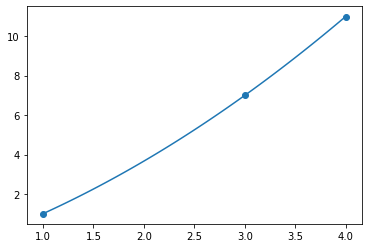

In [18]:
xp = np.linspace(x.min(),x.max(),100)
Xp = np.c_[np.ones(len(xp)),xp,xp**2]
yp = Xp@b
plt.scatter(x,y)
plt.plot(xp,yp)

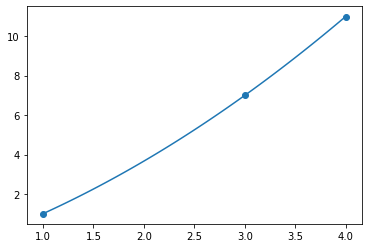

In [20]:
l0 = ((xp-x[1])*(xp-x[2]))/((x[0]-x[1])*(x[0]-x[2]))
l1 = ((xp-x[0])*(xp-x[2]))/((x[1]-x[0])*(x[1]-x[2]))
l2 = ((xp-x[0])*(xp-x[1]))/((x[2]-x[1])*(x[2]-x[0]))
plt.scatter(x,y)
plt.plot(xp, l0*y[0]+l1*y[1]+l2*y[2])